<a href="https://colab.research.google.com/github/DeadLetterQueue/prettymaps/blob/main/ReadGPXFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install overpy
!pip install git+https://github.com/abey79/vsketch#egg=vsketch
!pip install git+https://github.com/DeadLetterQueue/prettymaps.git
!pip install vsketch
!pip install cartopy
!mkdir ../prints
!mkdir ../assets
!mkdir ../assets/Permanent_Marker/
!wget -O ../assets/Permanent_Marker/PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

In [5]:
!pip uninstall -y prettymaps
!pip install --no-dependencies git+https://github.com/DeadLetterQueue/prettymaps.git

Found existing installation: prettymaps 0.1.3
Uninstalling prettymaps-0.1.3:
  Successfully uninstalled prettymaps-0.1.3
  Cloning https://github.com/DeadLetterQueue/prettymaps.git to /tmp/pip-req-build-68vnkliw
  Running command git clone -q https://github.com/DeadLetterQueue/prettymaps.git /tmp/pip-req-build-68vnkliw
  Created wheel for prettymaps: filename=prettymaps-0.1.3-py3-none-any.whl size=23153 sha256=d168401e16aeef109c6344e37fca63ab3c9c89c541bbf420a9c8c81c592e537c
  Stored in directory: /tmp/pip-ephem-wheel-cache-3oop4ft9/wheels/f3/6c/8f/dbab5e14d6f9fa6eddc229b79889cef816ed3a26191a26717f
Successfully built prettymaps


In [1]:
# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')
import cartopy.crs as ccrs
from prettymaps import *
import vsketch
import osmnx as ox
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union
import warnings
from matplotlib.patches import Ellipse, Polygon
import matplotlib.hatch
import matplotlib.pyplot as plt
from shapely.ops import polylabel
import matplotlib.patheffects as path_effects

import overpy
import numpy as np
import geopandas as gpd
import shapely.geometry as geometry
from geopandas import GeoDataFrame, read_file
from shapely.ops import linemerge, unary_union, polygonize
import fiona

R
{'point': (29.54559, -98.62181), 'radius': 1100}
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
EPSG:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
E /content/drive/MyDrive/Afternoon_Walk.gpx
             name   cmt  ... type                                           geometry
0  Afternoon Walk  None  ...   10  MULTILINESTRING ((-98.62185 29.54555, -98.6219...

[1 rows x 13 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:261: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in t:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:276: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:



POLYGON ((536634.0245379297 3268488.752225668, 536633.9467908678 3268488.69152611, 536633.8634421381 3268488.638781146, 536633.7753026433 3268488.594503934, 536633.6832298967 3268488.559125251, 536633.5881196777 3268488.532989294, 536633.4908973178 3268488.516350344, 536633.3925086971 3268488.50937028, 536633.2939110429 3268488.512117012, 536633.1960636157 3268488.524563818, 536633.0999183775 3268488.546589601, 536633.006410729 3268488.577980072, 536632.9164504104 3268488.618429831, 536632.8309126492 3268488.667545341, 536632.7506296459 3268488.724848756, 536632.6763824772 3268488.789782568, 536632.6088934969 3268488.861715033, 536632.5488193082 3268488.939946317, 536632.4967443753 3268489.023715305, 536632.4531753376 3268489.112207004, 536632.4185360799 3268489.204560476, 536632.3931636091 3268489.29987721, 536632.3773047749 3268489.397229864, 536632.3711138688 3268489.495671292, 536632.3746511221 3268489.594243751, 536632.3878821209 3268489.691988227, 536632.4106781402 3268489.78795

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:261: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in t:


LINESTRING (535929.8271482158 3267655.932568259, 535930.6986184497 3267656.33456496, 535932.0536963458 3267656.782099685, 535933.1188044229 3267657.007103873, 535933.8939427619 3267657.009577446, 535935.3459127435 3267657.457421769, 535936.2172361229 3267657.68180783, 535937.1850981335 3267658.017304746, 535938.1529600873 3267658.352801746, 535939.410437896 3267659.021631243, 535941.5410069715 3267659.360839565, 535942.1195312646 3267660.249107648, 535943.6687464581 3267660.586460765, 535944.8286240491 3267661.476584712, 535946.2816541627 3267661.592025779, 535947.8301616049 3267662.150982593, 535948.5080536203 3267662.263949414, 535949.3779614163 3267662.931542741, 535950.1520381165 3267663.266422117, 535951.1184842158 3267664.045126483, 535952.5700988596 3267664.603774609, 535953.3427602347 3267665.381860449, 535953.8279289129 3267665.161804176, 535954.9913431902 3267664.943913579, 535956.9284800803 3267665.171704507, 535959.6400469934 3267665.623574242, 535960.6082614969 3267665.848

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:276: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:



POLYGON ((536634.8081733462 3268484.781776038, 536634.7756399224 3268484.772410819, 536634.6803385717 3268484.754741502, 536634.5837742827 3268484.746381461, 536634.4868542338 3268484.747409233, 536634.3904889454 3268484.757815164, 536634.2955837263 3268484.777501493, 536634.2030301684 3268484.806283278, 536634.1136977711 3268484.843890125, 536634.0284257721 3268484.889968736, 536633.9480152638 3268484.944086222, 536633.8732216668 3268485.005734175, 536633.8047476334 3268485.074333439, 536633.7432364466 3268485.149239554, 536633.6892659765 3268485.229748811, 536633.6433432514 3268485.315104863, 536633.6058996947 3268485.404505826, 536633.5772870721 3268485.497111819, 536633.557774186 3268485.592052851, 536633.5475443514 3268485.688436992, 536633.5466936731 3268485.785358757, 536633.5552301428 3268485.881907609, 536633.5730735641 3268485.977176516, 536633.6000563061 3268486.070270468, 536633.6359248781 3268486.160314888, 536633.6803423107 3268486.246463852, 536634.0657196271 3268486.91

/usr/local/lib/python3.7/dist-packages/prettymaps/draw.py:110: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  layers = dict(zip(k, v))
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


A
{'perimeter': <shapely.geometry.polygon.Polygon object at 0x7f31f8b04450>, 'gpx': <shapely.geometry.polygon.Polygon object at 0x7f31f8a8d390>, 'gpxx': <shapely.geometry.polygon.Polygon object at 0x7f31f8b59090>}


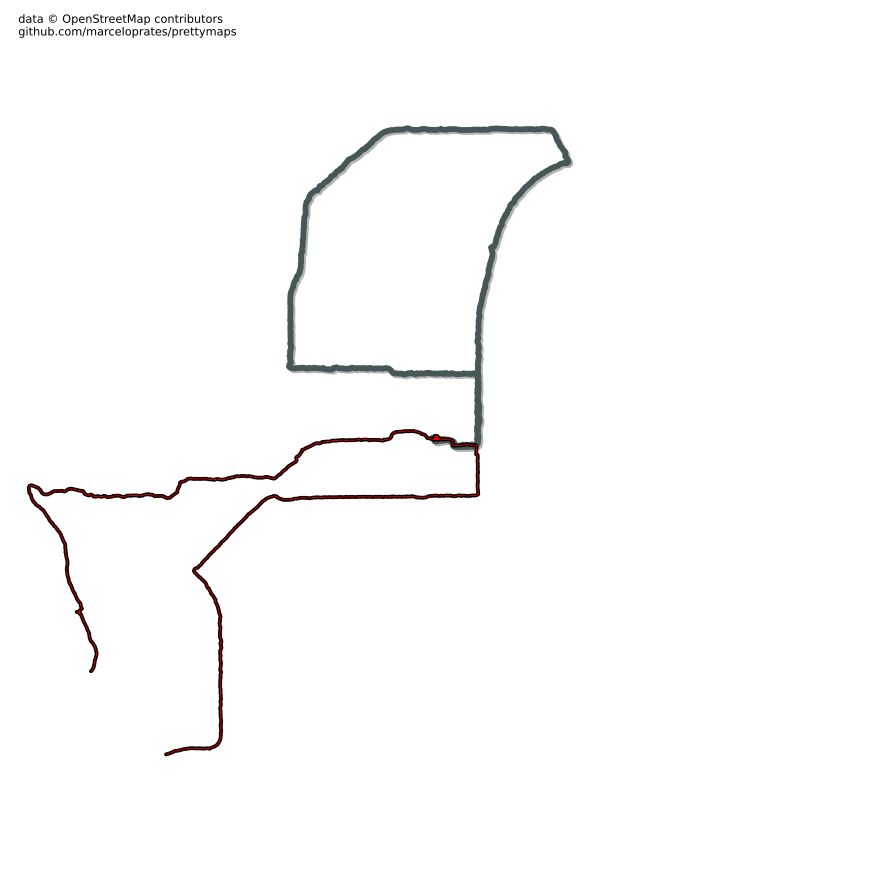

In [2]:
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

def postprocessing(layers):
  return layers

layers = plot(
    (29.54559,-98.62181), radius = 1100,
    ax = ax,
    heat_map = True,
    postprocessing = postprocessing,
    layers = {
            'perimeter': {},
            'gpx': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk.gpx','width': '3'}},
            'gpxx': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk2.gpx'}},
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'gpx': {'fc': '#FF0000', 'ec': '#475657', 'alpha': 1, 'lw': 5, 'zorder': 3, 'path_effects': [path_effects.SimpleLineShadow(),path_effects.Normal()]},
            #'gpxx': {'fc': '#FF0000', 'ec': '#475657', 'alpha': 1, 'lw': 10, 'zorder': 3, 'path_effects': [path_effects.PathPatchEffect(offset=(4, -4), hatch='xxxx', facecolor='gray'),path_effects.PathPatchEffect(edgecolor='white', linewidth=1.1, facecolor='black')]},
            'gpxx': {'fc': '#FF0000', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3, 'path_effects': [path_effects.Stroke(linewidth=3, foreground='black'),path_effects.Normal()]},
        }
)

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

def postprocessing(layers):
  print(layers['water']);
  return layers

layers = plot(
    (29.54559,-98.62181), radius = 1100,
    ax = ax,
    postprocessing = postprocessing,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'gpx': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk.gpx'}},
            'gpx2': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk2.gpx'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'gpx': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 3, 'zorder': 4},
            'gpx2': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 3, 'zorder': 4},
            'coastline': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 7},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
        }
)

R
{'point': (29.54559, -98.62181), 'radius': 1100}
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
EPSG:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5


/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:787: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:787: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx

E
             unique_id  ...          type
0       node/368164568  ...           NaN
1        way/242377359  ...           NaN
2        way/242377360  ...           NaN
3        way/265787926  ...           NaN
4        way/368302848  ...           NaN
..                 ...  ...           ...
306      way/987326901  ...           NaN
307      way/987343060  ...           NaN
308      way/987343061  ...           NaN
309  relation/12095616  ...  multipolygon
310  relation/12095617  ...  multipolygon

[311 rows x 34 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:373: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:373: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry

POLYGON ((535842.3653698597 3268071.96208724, 535842.4935827312 3268071.25335789, 535837.98103727 3268070.463373784, 535837.823158478 3268071.360373403, 535837.1840103562 3268071.258616471, 535836.4341483794 3268075.499974457, 535836.9376873805 3268075.590219424, 535835.1518387197 3268085.689744804, 535839.3351334004 3268086.423278401, 535839.0885383282 3268087.79644739, 535841.0252516862 3268088.135020825, 535840.8675139667 3268088.987699775, 535847.5588449135 3268090.161351538, 535850.5189540391 3268073.384161847, 535842.3653698597 3268071.96208724))
POLYGON ((535870.3914153519 3268097.591376016, 535870.6162005094 3268096.982677097, 535872.4258972405 3268097.653259524, 535872.9242650912 3268096.325214506, 535877.2597857487 3268097.934589014, 535882.6636980822 3268083.52529327, 535870.4023133636 3268078.965469566, 535864.2655739508 3268095.311484499, 535870.3914153519 3268097.591376016))
POLYGON ((535887.1112624484 3268080.381590844, 535877.6195937801 3268100.561760685, 535884.5562555

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:


                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.575767587, 537418.5358881202 3267716.590920862, 537338.5510413951 3267644.096881469, 537251.8456851366 3267579.791806635, 537159.2548393236 3267524.294989384, 537061.6702044166 3267478.140894405, 536960.0315737949 3267441.774010862, 536855.3177830328 3267415.544571724, 536748.5372831775 3267399.705180828, 536640.718428815 3267394.408380168, 536532.8995744525 3267399.705180828, 536426.1190745973 3267415.544571724, 536321.4052838351 3267441.774010862, 536219.7666532134 32

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


       unique_id      osmid  ...            operator           golf
0   way/79120353   79120353  ...                 NaN            NaN
1  way/113645527  113645527  ...                 NaN            NaN
2  way/178243215  178243215  ...                 NaN            NaN
3  way/242377369  242377369  ...  City ofSan Antonio            NaN
4  way/765590140  765590140  ...                 NaN  driving_range
5  way/842009818  842009818  ...                 NaN            NaN

[6 rows x 16 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and 

E
Empty GeoDataFrame
Columns: [geometry]
Index: []
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.575767587, 537418.5358881202 3267716.590920862, 537338.5510413951 3267644.096881469, 537251.8456851366 3267579.791806635, 537159.2548393236 3267524.294989384, 537061.6702044166 3267478.140894405, 536960.0315737949 3267441.774010862, 536855.3177830328 3267415.544571724, 536748.5372831775 3267399.705180828, 536640.718428815 3267394.408380168, 536532.8995744525 3267399.705180828, 536426.1190745973 3267415.544571724, 5

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and 

E
       unique_id  ...                                           geometry
0  way/242377367  ...  POLYGON ((-98.61947 29.55111, -98.61936 29.551...
1  way/242377368  ...  POLYGON ((-98.61813 29.55195, -98.61807 29.551...
2  way/770931903  ...  POLYGON ((-98.61723 29.55266, -98.61723 29.552...
3  way/770931905  ...  POLYGON ((-98.61791 29.55316, -98.61791 29.553...
4  way/788313074  ...  POLYGON ((-98.63013 29.53528, -98.63007 29.536...

[5 rows x 7 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.5757675

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/prettymaps/draw.py:110: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  layers = dict(zip(k, v))
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/prettymaps/draw.py:78: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` prope

MULTILINESTRING ((-98.62184600000001 29.545548, -98.621898 29.545538, -98.621915 29.545544, -98.621899 29.545545, -98.621909 29.545548, -98.621903 29.545548, -98.62190099999999 29.545547, -98.621892 29.545539, -98.621888 29.545548, -98.62188 29.545542, -98.621877 29.545536, -98.621882 29.545549, -98.621886 29.545546, -98.621883 29.545551, -98.621871 29.545559, -98.62185599999999 29.545557, -98.62182300000001 29.545547, -98.621802 29.545543, -98.621774 29.545523, -98.621765 29.545517, -98.62177 29.545512, -98.621757 29.545516, -98.62175499999999 29.545509, -98.62173900000001 29.545521, -98.62172099999999 29.545521, -98.62172200000001 29.54552, -98.621708 29.545516, -98.621701 29.545518, -98.621695 29.545519, -98.621683 29.545515, -98.621675 29.545512, -98.62165899999999 29.545511, -98.62165 29.545511, -98.621641 29.545512, -98.62163200000001 29.545512, -98.62161999999999 29.545515, -98.62160900000001 29.545517, -98.621599 29.545516, -98.621596 29.545518, -98.621583 29.545517, -98.621575

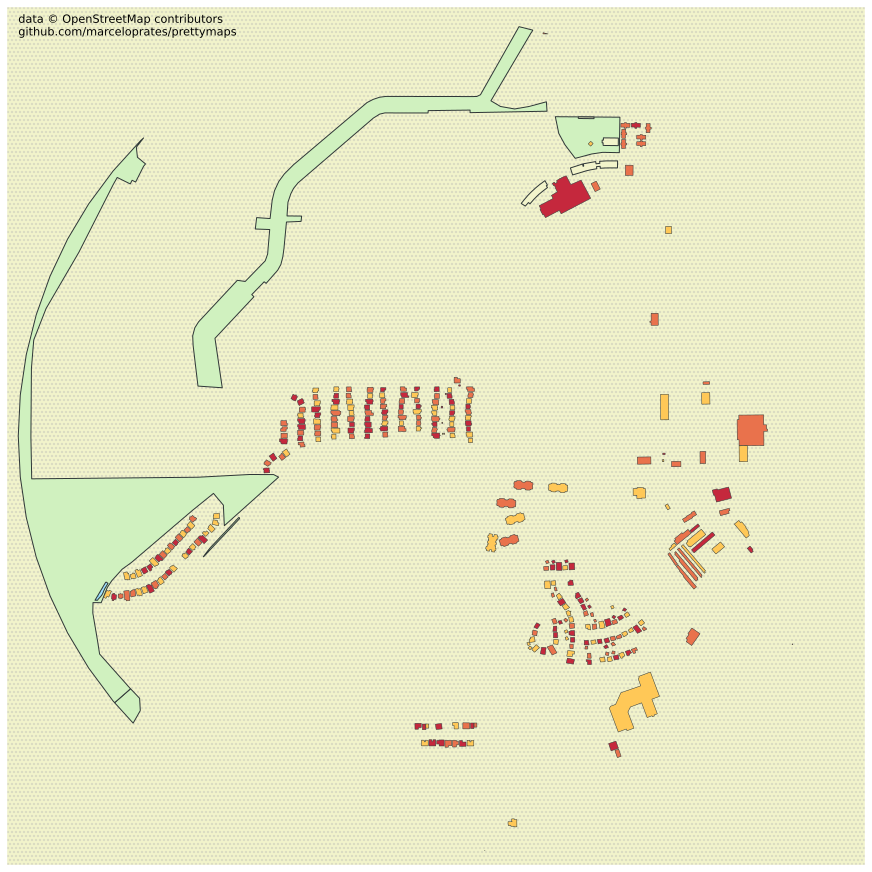

In [ ]:
ox.utils.config(log_console=True)
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

def postprocessing(layers):
  print(layers['water']);
  return layers

layers = plot(
    (29.54559,-98.62181), radius = 1100,
    ax = ax,
    postprocessing = postprocessing,
    layers = {
            'perimeter': {},
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'gpx': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk.gpx'}},
            'gpx2': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk2.gpx'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'gpx': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'gpx2': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'coastline': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 7},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        }
)

# Add meadows, parks & scrubs
for tags, kwargs in [
    ({'landuse': 'meadow'}, {'fc': '#AAD897', 'ec': '#8bc49e', 'lw': 0, 'zorder': 1, 'hatch': 'ooo...'}),
    ({'leisure': 'park'}, {'fc': '#AAD897', 'ec': '#8bc49e', 'lw': 0, 'zorder': 1, 'hatch': 'ooo...'}),
    ({'natural': 'scrub'}, {'fc': '#D2D68D', 'ec': '#AEB441', 'lw': 0, 'zorder': 3, 'hatch': 'ooo...'}),
]:
    ax.add_patch(PolygonPatch(
        unary_union(
            ox.project_gdf(
                ox.geometries_from_point(
                    (-22.9926, -43.4152),
                    tags = tags,
                    dist = 1000
                )
            ).geometry
        ),
        **kwargs
    ))

fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'

tracks_layer = fiona.open(fname, layer='tracks')
feature = tracks_layer[0]
data = {'type': 'MultiLineString',
        'coordinates': feature['geometry']['coordinates']}
shp = shape(data)
print(shp)


In [ ]:
import fiona
fiona.listlayers('/content/drive/MyDrive/Afternoon_Walk.gpx')
[u'waypoints', u'routes', u'tracks', u'route_points', u'track_points']
# open layer tracks
layer = fiona.open('/content/drive/MyDrive/Afternoon_Walk.gpx', layer='tracks')
geom = layer[0] # only one feature here)
geom['geometry']['type']
'MultiLineString'
# convert to shapely geometry
from shapely.geometry import shape, mapping
tracks = shape(geom['geometry'])
tracks


polygs = {'type': 'Polygon', 'coordinates': [[(-79.159610379971326, 35.615399458474776), (-79.153546268732796, 35.615411586697256), (-79.153109652723629, 35.611215221720187), (-79.159392071966749, 35.611118195940371), (-79.159610379971326, 35.615399458474776)]]}
poly = shape(polygs)


geometry = poly.intersection(tracks)
mapping(geometry)['type']
'MultiLineString'

import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch
def plot_poly(ax,ob):
   patch = PolygonPatch(ob, facecolor='#6699cc', edgecolor='#6699cc')
   ax.add_patch(patch)
def plot_line(ax, ob, col):
   x, y = ob.xy
   ax.plot(x, y, color=col)
def plot_multiline(ax, ob,col):
   for line in ob:
      plot_line(ax,line,col)

fig = plt.figure() 
ax = fig.gca()
#plot_multiline(ax, tracks,'b')
plot_poly(ax,poly)
plot_multiline(ax, geometry,'r')


In [ ]:
import fiona; help(fiona.open)

In [ ]:
# General style parameters
palette = ['#433633', '#FF5E5B']
background_c = '#F2F4CB'
dilate = 100

# Setup plot
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

layers = plot(
    'Albany, Texas', radius = 2000,
    ax = ax,
    
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}, 'circle': False, 'dilate': dilate},
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False},
            'golf_course':        {'tags': {'leisure': 'golf_course'}},
            'golf_bunker':        {'tags': {'golf': 'bunker'}},
            'golf_fairway':       {'tags': {'golf': 'fairway'}},
            'golf_rough':         {'tags': {'golf': 'rough'}},
            'golf_green':         {'tags': {'golf': 'green'}},
            'golf_hole':          {'tags': {'golf': 'hole'}},
            'golf_tee':           {'tags': {'golf': 'tee'}},
            'golf_driving_range': {'tags': {'golf': 'driving_range'}},
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': background_c, 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            'golf_rough':            {'fc': '#C6E8A7', 'ec': '#B1DE89', 'lw': 0, 'zorder': 1,                'hatch': '......'},
            'golf_fairway':          {'fc': '#CDEBB0', 'ec': '#CDEBB0', 'lw': 0, 'zorder': 2},
            'golf_driving_range':    {'fc': '#AAE0CB', 'ec': '#EBD499', 'lw': 0, 'zorder': 2},
            'golf_green':            {'fc': '#AAE0CB', 'ec': '#AAE0CB', 'lw': 0, 'zorder': 4},
            'golf_bunker':           {'fc': '#F5E9C6', 'ec': '#F5E9C6', 'lw': 0, 'zorder': 4},
            'golf_tee':              {'fc': '#CDEBB0', 'ec': '#CDEBB0', 'lw': 0, 'zorder': 4},
            'golf_hole':             {'fc': '#FF0000', 'ec': '#FF0000', 'lw': 1, 'zorder': 7},
            
        },

        osm_credit = {'x': .405, 'y': .68, 'color': '#2F3737'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
a = .2
ax.set_xlim(xmin+a*dx, xmax-a*dx)
ax.set_ylim(ymin+a*dy, ymax-a*dy)

ax.text(
    xmin+.39*dx, ymin+.305*dy,
    ' '*3 + 'Albany, Texas',
    color = '#FF0000',
    zorder = 6, rotation = +1.75,
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 24)
)

#plt.savefig('../prints/heerhugowaard.png')

# of features:
--------------
 1
Feature attribute data:
-----------------------
name: Afternoon Walk
cmt: None
desc: None
src: None
link1_href: None
link1_text: None
link1_type: None
link2_href: None
link2_text: None
link2_type: None
number: None
type: 10


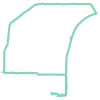

In [ ]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
# Open tracks layer
tracks_layer = fiona.open(fname, layer='tracks')
(feature) = tracks_layer[0]
print()
# Print out the number of features in the tracks layer
print("# of features:\n--------------\n", len(list(tracks_layer.items())))

# Print out fields and attribute data
properties = feature['properties']
print("Feature attribute data:\n-----------------------")
for k, v in properties.items():
    print('{}: {}'.format(k,v))

# Draw a quick plot of data using shapely
from shapely.geometry import shape
tracks_data = {'type': 'MultiLineString',
               'coordinates': feature['geometry']['coordinates']}
tracks_shape = shape(tracks_data)
tracks_shape


[[(-98.621846, 29.545548), (-98.621898, 29.545538), (-98.621915, 29.545544), (-98.621899, 29.545545), (-98.621909, 29.545548), (-98.621903, 29.545548), (-98.621901, 29.545547), (-98.621892, 29.545539), (-98.621888, 29.545548), (-98.62188, 29.545542), (-98.621877, 29.545536), (-98.621882, 29.545549), (-98.621886, 29.545546), (-98.621883, 29.545551), (-98.621871, 29.545559), (-98.621856, 29.545557), (-98.621823, 29.545547), (-98.621802, 29.545543), (-98.621774, 29.545523), (-98.621765, 29.545517), (-98.62177, 29.545512), (-98.621757, 29.545516), (-98.621755, 29.545509), (-98.621739, 29.545521), (-98.621721, 29.545521), (-98.621722, 29.54552), (-98.621708, 29.545516), (-98.621701, 29.545518), (-98.621695, 29.545519), (-98.621683, 29.545515), (-98.621675, 29.545512), (-98.621659, 29.545511), (-98.62165, 29.545511), (-98.621641, 29.545512), (-98.621632, 29.545512), (-98.62162, 29.545515), (-98.621609, 29.545517), (-98.621599, 29.545516), (-98.621596, 29.545518), (-98.621583, 29.545517), (-9

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


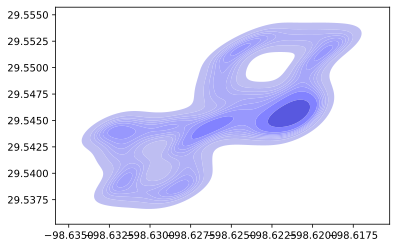

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas
x = []
y = []
fnames = ['/content/drive/MyDrive/Afternoon_Walk.gpx','/content/drive/MyDrive/Afternoon_Walk2.gpx']
for fname in fnames:
  tracks_layer = fiona.open(fname, layer='tracks')
  (feature) = tracks_layer[0]
  print(feature['geometry']['coordinates'])
  for point in feature['geometry']['coordinates']:
    for i in point:
      x.append(i[0])
      y.append(i[1])

res = sn.kdeplot(x,y,color='blue',shade=True)
print(res)
plt.show()

{'type': 'MultiLineString', 'coordinates': [[(-98.621846, 29.545548), (-98.621898, 29.545538), (-98.621915, 29.545544), (-98.621899, 29.545545), (-98.621909, 29.545548), (-98.621903, 29.545548), (-98.621901, 29.545547), (-98.621892, 29.545539), (-98.621888, 29.545548), (-98.62188, 29.545542), (-98.621877, 29.545536), (-98.621882, 29.545549), (-98.621886, 29.545546), (-98.621883, 29.545551), (-98.621871, 29.545559), (-98.621856, 29.545557), (-98.621823, 29.545547), (-98.621802, 29.545543), (-98.621774, 29.545523), (-98.621765, 29.545517), (-98.62177, 29.545512), (-98.621757, 29.545516), (-98.621755, 29.545509), (-98.621739, 29.545521), (-98.621721, 29.545521), (-98.621722, 29.54552), (-98.621708, 29.545516), (-98.621701, 29.545518), (-98.621695, 29.545519), (-98.621683, 29.545515), (-98.621675, 29.545512), (-98.621659, 29.545511), (-98.62165, 29.545511), (-98.621641, 29.545512), (-98.621632, 29.545512), (-98.62162, 29.545515), (-98.621609, 29.545517), (-98.621599, 29.545516), (-98.62159

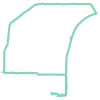

In [ ]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
# Open tracks layer
tracks_layer = fiona.open(fname, layer='tracks')
feature = tracks_layer[0]
print(feature['geometry'])
# Print out the number of features in the tracks layer
print("# of features:\n--------------\n", len(list(tracks_layer.items())))

# Print out fields and attribute data
properties = feature['properties']
print("Feature attribute data:\n-----------------------")
for k, v in properties.items():
    print('{}: {}'.format(k,v))

# Draw a quick plot of data using shapely
from shapely.geometry import shape
tracks_data = {'type': 'MultiLineString',
               'coordinates': feature['geometry']['coordinates']}
tracks_shape = shape(tracks_data)
tracks_shape


In [ ]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
# Open tracks layer
tracks_layer = fiona.open(fname, layer='tracks',crs_wkt=dict(ellps='WGS84', datum='WGS84', proj='longlat'))
feature = tracks_layer[0]
print(feature['geometry'])
print(tracks_layer.crs)

original = dict(ellps='WGS84', datum='WGS84', proj='longlat')

tracks_layer.crs = {'init':original}

# Print out the number of features in the tracks layer
print("# of features:\n--------------\n", len(list(tracks_layer.items())))

# Print out fields and attribute data
properties = feature['properties']
print("Feature attribute data:\n-----------------------")
for k, v in properties.items():
    print('{}: {}'.format(k,v))

# Draw a quick plot of data using shapely
from shapely.geometry import shape
tracks_data = {'type': 'MultiLineString',
               'coordinates': feature['geometry']['coordinates']}
tracks_shape = shape(tracks_data)
tracks_shape

{'type': 'MultiLineString', 'coordinates': [[(-98.621846, 29.545548), (-98.621898, 29.545538), (-98.621915, 29.545544), (-98.621899, 29.545545), (-98.621909, 29.545548), (-98.621903, 29.545548), (-98.621901, 29.545547), (-98.621892, 29.545539), (-98.621888, 29.545548), (-98.62188, 29.545542), (-98.621877, 29.545536), (-98.621882, 29.545549), (-98.621886, 29.545546), (-98.621883, 29.545551), (-98.621871, 29.545559), (-98.621856, 29.545557), (-98.621823, 29.545547), (-98.621802, 29.545543), (-98.621774, 29.545523), (-98.621765, 29.545517), (-98.62177, 29.545512), (-98.621757, 29.545516), (-98.621755, 29.545509), (-98.621739, 29.545521), (-98.621721, 29.545521), (-98.621722, 29.54552), (-98.621708, 29.545516), (-98.621701, 29.545518), (-98.621695, 29.545519), (-98.621683, 29.545515), (-98.621675, 29.545512), (-98.621659, 29.545511), (-98.62165, 29.545511), (-98.621641, 29.545512), (-98.621632, 29.545512), (-98.62162, 29.545515), (-98.621609, 29.545517), (-98.621599, 29.545516), (-98.62159

AttributeError: ignored

In [ ]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
lines = gpd.read_file(fname, layer='tracks')
print(lines)

             name   cmt  ... type                                           geometry
0  Afternoon Walk  None  ...   10  MULTILINESTRING ((-98.62185 29.54555, -98.6219...

[1 rows x 13 columns]
